In [2]:
# Set up device (GPU if available, otherwise CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [3]:

# -------------------------------------------------
# 2. Load and Preprocess Data
# -------------------------------------------------

# 2.1 Load competition data
print("Loading competition data...")
CHALLENGE = "antiviral-potency-2025"
competition = po.load_competition(f"asap-discovery/{CHALLENGE}")
competition.cache()

# Get train-test split
train, test = competition.get_train_test_split()

# 2.2 Process competition data
print("Processing competition data...")
# Extract data into lists
smiles = []
pIC50_MERS = []
pIC50_SARS = []

# Iterate through dataset
for i in range(len(train)):
    item = train[i]
    # Extract SMILES string
    smiles.append(item[0])
    # Extract pIC50 values
    pIC50_MERS.append(item[1]['pIC50 (MERS-CoV Mpro)'])
    pIC50_SARS.append(item[1]['pIC50 (SARS-CoV-2 Mpro)'])

# Create and clean DataFrame
mpro_df_comp = pd.DataFrame({
    'SMILES': smiles,
    'pIC50_MERS': pIC50_MERS,
    'pIC50_SARS': pIC50_SARS
})
mpro_df_comp = mpro_df_comp.dropna()  # Remove rows with missing values

# 2.3 Load and process MPRO dataset (2k data points)
print("Loading MPRO dataset...")
mpro_dataset = pd.read_csv('DD/data/Mpro_sorted.csv')
# Select relevant columns and clean data
mpro_dataset = mpro_dataset[['SMILES', 'affinity']]
mpro_dataset.dropna(inplace=True)

# Convert SMILES to molecular fingerprints
print("Converting SMILES to fingerprints...")

# MPRO dataset fingerprints
X_mpro = []
Y_mpro = []
for i, row in mpro_dataset.iterrows():
    try:
        mol = dm.to_mol(row['SMILES'])
        if mol is not None:
            X_mpro.append(dm.to_fp(mol))
            Y_mpro.append(row['affinity'])
    except Exception as e:
        print(f"Error processing molecule {i}: {e}")

X_mpro = np.array(X_mpro)
Y_mpro = np.array(Y_mpro)

# Competition dataset fingerprints
X_train_comp = []
for smi in mpro_df_comp['SMILES']:
    try:
        mol = dm.to_mol(smi)
        if mol is not None:
            X_train_comp.append(dm.to_fp(mol))
    except Exception as e:
        print(f"Error processing molecule: {e}")

X_train_comp = np.array(X_train_comp)
Y_sars = mpro_df_comp['pIC50_SARS'].to_numpy()
Y_mers = mpro_df_comp['pIC50_MERS'].to_numpy()

# Test dataset fingerprints
X_test = []
for smi in test.X:
    try:
        mol = dm.to_mol(smi)
        if mol is not None:
            X_test.append(dm.to_fp(mol))
    except Exception as e:
        print(f"Error processing test molecule: {e}")

X_test = np.array(X_test)

# When creating tensors:
X_mpro_tensor = torch.tensor(X_mpro, dtype=torch.float32).to(device)  
Y_mpro_tensor = torch.tensor(Y_mpro, dtype=torch.float32).to(device)

X_train_comp_tensor = torch.tensor(X_train_comp, dtype=torch.float32).to(device)  
Y_sars_tensor = torch.tensor(Y_sars, dtype=torch.float32).to(device)
Y_mers_tensor = torch.tensor(Y_mers, dtype=torch.float32).to(device)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)  

print(f"MPRO dataset: {len(X_mpro)} molecules")
print(f"Competition training data: {len(X_train_comp)} molecules")
print(f"Test data: {len(X_test)} molecules")

Loading competition data...


[2025-03-04 07:47:43] INFO     The version of Polaris that was used to create the artifact (0.11.0) ]8;id=859379;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=698701;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.9).                                                                           

                      WARNING  You're loading data from a remote location. If the dataset is small     ]8;id=61628;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=362974;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/dataset/_base.py#181\181]8;;\
                               enough, consider caching the dataset first using                                    
                               CompetitionSpecification.cache() for more performant data access.                   

Output()

[07:47:43] Copying to destination                                                                      ]8;id=339425;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=974039;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/dataset/_base.py#380\380]8;;\
           /home/zeus/.cache/polaris/datasets/973264fd-10be-4e1b-a773-fe78adb34b63/data.zarr                       

           For large Zarr archives, this may take a while.                                             ]8;id=935865;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=376901;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/dataset/_base.py#381\381]8;;\

[07:47:44]  Success: Copying Zarr keys                                                                ]8;id=94027;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=503784;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/utils/context.py#53\53]8;;\

            Success: Copying Zarr archive                                                             ]8;id=635790;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=715788;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/utils/context.py#53\53]8;;\

Processing competition data...
Loading MPRO dataset...
Converting SMILES to fingerprints...
MPRO dataset: 2062 molecules
Competition training data: 712 molecules
Test data: 297 molecules


In [4]:
selection_protocols = {
    # "random": [("random", 60)] + [("random", 30)] * 10,
    # "ucb-alternate": [("random", 60)] + [("explore", 30) if i % 2 == 0 else ("exploit", 30) for i in range(10)],
    # "ucb-sandwich": [("random", 60)] + [("explore", 30)] * 2 + [("exploit", 30)] * 6 + [("explore", 30)] * 2,
    # "ucb-explore-heavy": [("random", 60)] + [("explore", 30)] * 7 + [("exploit", 30)] * 3,
    "ucb-exploit-heavy": [("random", 60)] + [("explore", 30)] * 3 + [("exploit", 30)] * 7,
#     "ucb-gradual": [("random", 60)] + [("explore", 30)] * 3 + [("ucb", 30)] * 4 + [("exploit", 30)] * 3,
#     "ucb-balanced": [("random", 60)] + [("ucb", 30)] * 10,
 }

In [5]:
def get_ucb_params(protocol_name):
    if "exploit" in protocol_name:
        return 1, 0
    elif "explore" in protocol_name:
        return 0, 1
    else:
        return 0.5, 0.5

In [6]:
class TanimotoKernel(gpytorch.kernels.Kernel):
    def __init__(self, **kwargs):
     
        super(TanimotoKernel, self).__init__(**kwargs)
        self.register_parameter(name="raw_lengthscale", parameter=torch.nn.Parameter(torch.zeros(1)))

    def forward(self, x1, x2, diag=False, **params):
        if diag:
            return self.covar_dist(x1, x2, diag=True, **params)
        else:
            x1_norm = x1.pow(2).sum(dim=-1, keepdim=True)
            x2_norm = x2.pow(2).sum(dim=-1, keepdim=True)
            x1_dot_x2 = torch.matmul(x1 , x2.transpose(-1, -2))
            denominator = x1_norm + x2_norm.transpose(-1, -2) - x1_dot_x2
            return x1_dot_x2 / denominator.clamp(min=1e-8)


class GPRegressionModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood, kernel = 'tanimoto'):
  
        super(GPRegressionModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = TanimotoKernel()

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x.add_jitter(1e-6))

In [7]:
class BaseKernel(ABC):
    @abstractmethod
    def get_kernel(self):
        pass

In [8]:
class MaternKernel(BaseKernel):
    def get_kernel(self):
        return gpytorch.kernels.ScaleKernel(gpytorch.kernels.MaternKernel())

class LinearKernel(BaseKernel):
    def get_kernel(self):
        return gpytorch.kernels.ScaleKernel(gpytorch.kernels.LinearKernel())

class RBFKernel(BaseKernel):
    def get_kernel(self):
        return gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

class RQKernel(BaseKernel):
    def get_kernel(self):
        return gpytorch.kernels.ScaleKernel(gpytorch.kernels.RQKernel())


In [9]:
class GPRegressionModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood, kernel):
        super(GPRegressionModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = kernel.get_kernel()

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x.add_jitter(1e-6))

In [10]:
class FingerprintGenerator(ABC):
    @abstractmethod
    def generate(self, data):
        pass

class ECFPGenerator(FingerprintGenerator):
    def generate(self, data):
        return smiles_to_ecfp8(data, 'SMILES')

class MACCSGenerator(FingerprintGenerator):
    def generate(self, data):
        smiles = data['SMILES'].tolist()
        transformer = FPVecTransformer(kind='maccs', dtype=float)
        return transformer(smiles)

class ChemBERTaGenerator(FingerprintGenerator):
    def __init__(self, chemberta_path):
        self.chemberta_path = chemberta_path

    def generate(self, data):
        chemberta_data = np.load(self.chemberta_path)
        return chemberta_data['tokens']

class FingerprintFactory:
    @staticmethod
    def get_generator(fingerprint_type, chemberta_path=None):
        if fingerprint_type == 'ecfp':
            return ECFPGenerator()
        elif fingerprint_type == 'maccs':
            return MACCSGenerator()
        elif fingerprint_type == 'chemberta':
            return ChemBERTaGenerator(chemberta_path)
        else:
            raise ValueError(f"Unknown fingerprint type: {fingerprint_type}")


## Seed Experiment

In [20]:
    kernels = [
        MaternKernel(),
        #LinearKernel(),
        #RBFKernel(),
        #RQKernel(),
        #TanimotoKernel()
    ]

In [31]:
def active_learning(original_df, fingerprints, epochs, lr, lr_decay, selection_protocol, ucb_alpha=1.0, ucb_beta=1.0, ucb_selection=ucb_selection, kernel=kernel):
    selected_df = pd.DataFrame(columns=original_df.columns)
    top_2p_count = 0
    top_5p_count = 0
    already_selected_indices = []
    cycle_results = []
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    likelihood = gpytorch.likelihoods.GaussianLikelihood().to(device)
    train_x = torch.tensor(fingerprints).float().to(device)
    train_y = torch.tensor(original_df['affinity'].values).float().to(device)
    gp_model = GPRegressionModel(train_x, train_y, likelihood, kernel=kernel).to(device)
    
    all_predictions = pd.DataFrame(index=original_df.index)
    
    def select_samples(method, batch_size):
        if method == "random":
            available_indices = list(set(range(len(original_df))) - set(already_selected_indices))
            return np.random.choice(available_indices, size=batch_size, replace=False)
        else:
            alpha, beta = {
                "ucb": (0.5, 0.5),
                "explore": (0, 1),
                "exploit": (1, 0)
            }.get(method, (0.5, 0.5))
            return ucb_selection(fingerprints, gp_model, likelihood, batch_size=batch_size, 
                                 alpha=alpha, beta=beta, already_selected_indices=already_selected_indices)

    for cycle, (method, batch_size) in enumerate(selection_protocol):

        new_indices = select_samples(method, batch_size)

        new_selection = original_df.iloc[new_indices]
        selected_df = pd.concat([selected_df, new_selection])
        top_2p_count += new_selection['top_2p'].sum()
        top_5p_count += new_selection['top_5p'].sum()
        already_selected_indices.extend(new_indices)

        # Update training data
        train_x = torch.tensor(fingerprints[selected_df.index]).float().to(device)
        train_y = torch.tensor(selected_df['affinity'].values).float().to(device)

        # Reinitialize and train the model with the updated training data
        likelihood = gpytorch.likelihoods.GaussianLikelihood().float().to(device)
        gp_model = GPRegressionModel(train_x, train_y, likelihood,kernel=kernel).to(device)
        gp_model, likelihood, _ = train_gp_model(train_x, train_y, likelihood, gp_model, epochs, lr, lr_decay)

        # Evaluate model on entire dataset
        gp_model.eval()
        likelihood.eval()
        with torch.no_grad(), gpytorch.settings.fast_pred_var():
            all_x = torch.tensor(fingerprints).float().to(device)
            output = likelihood(gp_model(all_x))
            predictions = output.mean.cpu().numpy()
            uncertainties = output.stddev.cpu().numpy()

        # Store predictions and set information
        all_predictions[f'pred_{cycle}'] = predictions
        all_predictions[f'set_{cycle}'] = 'pool'
        all_predictions.loc[already_selected_indices, f'set_{cycle}'] = 'train'
        all_predictions.loc[new_indices, f'set_{cycle}'] = 'selection'

        r2, spearman = calculate_metrics(gp_model, likelihood, all_x, torch.tensor(original_df['affinity'].values).float().to(device))
        rmse = np.sqrt(np.mean((original_df['affinity'] - predictions)**2))

        cycle_results.append({
            'cycle': cycle,
            'top_2p': top_2p_count,
            'top_5p': top_5p_count,
            'r2': r2,
            'spearman': spearman,
            'compounds_acquired': len(selected_df),
            'rmse': rmse,
            'method': method
        })

        # Log metrics to wandb
        wandb.log({
            'cycle': cycle,
            'top_2p_recall': top_2p_count / (0.02 * len(original_df)),
            'top_5p_recall': top_5p_count / (0.05 * len(original_df)),
            'r2': r2,
            'spearman': spearman,
            'compounds_acquired': len(selected_df),
            'rmse': rmse,
            'method': method
        })

        # Print diagnostics
        print(f"Cycle {cycle} ({method}):")
        print(f"  Compounds selected: {len(selected_df)}")
        print(f"  Top 2% compounds selected: {top_2p_count}")
        print(f"  Top 5% compounds selected: {top_5p_count}")
        print(f"  R2: {r2:.4f}")
        print(f"  Spearman correlation: {spearman:.4f}")
        print(f"  RMSE: {rmse:.4f}")
        print(f"  Mean affinity of selected compounds: {selected_df['affinity'].mean():.2f}")
        print(f"  Mean affinity of entire dataset: {original_df['affinity'].mean():.2f}")

    # Add this before the return statement
    save_path = 'DD/Polaris/saved_models/mpro_active_learning_model.pth'
    torch.save({
        'model_state_dict': gp_model.state_dict(),
        'likelihood_state_dict': likelihood.state_dict(),
    }, save_path)
    print(f"✅ Saved MPRO active learning model to {save_path}")
    
    return cycle_results, already_selected_indices, all_predictions, gp_model, likelihood

In [32]:
def run_experiment(original_df, fingerprints, dataset_name, kernel, fingerprint_type, wandb_run, seed):
    epochs = 100
    lr_decay = 0.95
    lr = 0.01
    
    metrics_data = []
    recall_data = []
    combined_data = []

    for protocol_name, protocol in tqdm(selection_protocols.items(), desc=f"Protocols for {dataset_name}"):
        print(f"✨ Running {protocol_name} on {dataset_name} with {kernel.__class__.__name__} and {fingerprint_type} (seed: {seed}) ✨")

        ucb_alpha, ucb_beta = get_ucb_params(protocol_name)
        
        wandb_run.config.update({
            "dataset": dataset_name,
            "protocol": protocol_name,
            "kernel": kernel.__class__.__name__,
            "fingerprint": fingerprint_type,
            "epochs": epochs,
            "lr": lr,
            "lr_decay": lr_decay,
            "seed": seed,
            "ucb_alpha": ucb_alpha,
            "ucb_beta": ucb_beta
        })
        
        np.random.seed(seed)
        torch.manual_seed(seed)
        
        cycle_results, selected_indices, predictions_df, final_model, final_likelihood = active_learning(
            original_df, fingerprints, epochs=epochs, lr=lr, lr_decay=lr_decay,
            selection_protocol=protocol, ucb_alpha=ucb_alpha, ucb_beta=ucb_beta,
            kernel=kernel
        )
        
        # Prepare metrics data
        for cycle, cycle_data in enumerate(cycle_results):
            metrics_data.append({
                'Dataset': dataset_name,
                'Protocol': protocol_name,
                'Cycle': cycle,
                'R2': cycle_data['r2'],
                'Spearman': cycle_data['spearman'],
                'RMSE': cycle_data['rmse'],
                'Compounds acquired': cycle_data['compounds_acquired'],
                'Kernel': kernel.__class__.__name__,
                'Fingerprint': fingerprint_type,
                'Seed': seed  # Add seed to metrics data
            })
        
        # Prepare recall data
        total_compounds = len(original_df)
        for cycle, cycle_data in enumerate(cycle_results):
            recall_data.append({
                'Dataset': dataset_name,
                'Protocol': protocol_name,
                'Cycle': cycle,
                'Recall (2%)': cycle_data['top_2p'] / (0.02 * total_compounds),
                'Recall (5%)': cycle_data['top_5p'] / (0.05 * total_compounds),
                'Compounds acquired': cycle_data['compounds_acquired'],
                'Kernel': kernel.__class__.__name__,
                'Fingerprint': fingerprint_type,
                'Seed': seed  # Add seed to recall data
            })
        
        # Prepare combined data
        for index, row in predictions_df.iterrows():
            combined_row = {
                'SMILES': original_df.loc[index, 'SMILES'],
                'affinity': original_df.loc[index, 'affinity'],
                'top_2p': original_df.loc[index, 'top_2p'],
                'top_5p': original_df.loc[index, 'top_5p'],
                'Dataset': dataset_name,
                'Protocol': protocol_name,
                'Kernel': kernel.__class__.__name__,
                'Fingerprint': fingerprint_type,
                'Seed': seed  # Add seed to combined data
            }
            for col in row.index:
                if col.startswith('pred_') or col.startswith('set_'):
                    combined_row[col] = row[col]

            selected_cycle = next((cycle for cycle, set_value in enumerate(row.filter(like='set_')) 
                                   if set_value == 'selection'), None)
            combined_row['selected_in_cycle'] = selected_cycle if selected_cycle is not None else 'None'
            
            combined_data.append(combined_row)

        # Log final results to wandb
        wandb_run.log({
            f"{dataset_name}_{protocol_name}_final_compounds_acquired": cycle_results[-1]['compounds_acquired'],
            f"{dataset_name}_{protocol_name}_final_top_2p_recall": cycle_results[-1]['top_2p'] / (0.02 * len(original_df)),
            f"{dataset_name}_{protocol_name}_final_top_5p_recall": cycle_results[-1]['top_5p'] / (0.05 * len(original_df)),
            f"{dataset_name}_{protocol_name}_final_r2": cycle_results[-1]['r2'],
            f"{dataset_name}_{protocol_name}_final_spearman": cycle_results[-1]['spearman'],
            f"{dataset_name}_{protocol_name}_final_rmse": cycle_results[-1]['rmse']
        })

    return pd.DataFrame(metrics_data), pd.DataFrame(recall_data), pd.DataFrame(combined_data)

Processing SMILES: 100%|██████████| 2062/2062 [00:00<00:00, 2920.38it/s]


Processing dataset: MPRO with MaternKernel and ecfp, seed 42


Protocols for MPRO:   0%|          | 0/1 [00:00<?, ?it/s]/tmp/ipykernel_12404/2365620270.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  selected_df = pd.concat([selected_df, new_selection])


✨ Running ucb-exploit-heavy on MPRO with MaternKernel and ecfp (seed: 42) ✨
Epoch 10/100 | Loss: 14.051
Epoch 20/100 | Loss: 13.428
Epoch 30/100 | Loss: 13.077
Epoch 40/100 | Loss: 12.875
Epoch 50/100 | Loss: 12.757
Epoch 60/100 | Loss: 12.687
Epoch 70/100 | Loss: 12.645
Epoch 80/100 | Loss: 12.621
Epoch 90/100 | Loss: 12.606
Epoch 100/100 | Loss: 12.597
Cycle 0 (random):
  Compounds selected: 60
  Top 2% compounds selected: 1
  Top 5% compounds selected: 3
  R2: -15.7593
  Spearman correlation: 0.0014
  RMSE: 5.9644
  Mean affinity of selected compounds: 6.05
  Mean affinity of entire dataset: 6.09
Epoch 10/100 | Loss: 20.271
Epoch 20/100 | Loss: 19.393
Epoch 30/100 | Loss: 18.897
Epoch 40/100 | Loss: 18.612
Epoch 50/100 | Loss: 18.445
Epoch 60/100 | Loss: 18.346
Epoch 70/100 | Loss: 18.287
Epoch 80/100 | Loss: 18.252
Epoch 90/100 | Loss: 18.231
Epoch 100/100 | Loss: 18.218
Cycle 1 (explore):
  Compounds selected: 90
  Top 2% compounds selected: 31
  Top 5% compounds selected: 33
  R2

Protocols for MPRO: 100%|██████████| 1/1 [01:03<00:00, 63.99s/it]



Summary for ecfp with MaternKernel:
                                Cycle         R2  Spearman      RMSE  \
Dataset Protocol          Seed                                         
MPRO    ucb-exploit-heavy 42       10 -12.898243  0.200594  5.431439   

                                Compounds acquired        Kernel Fingerprint  
Dataset Protocol          Seed                                                
MPRO    ucb-exploit-heavy 42                   360  MaternKernel        ecfp  


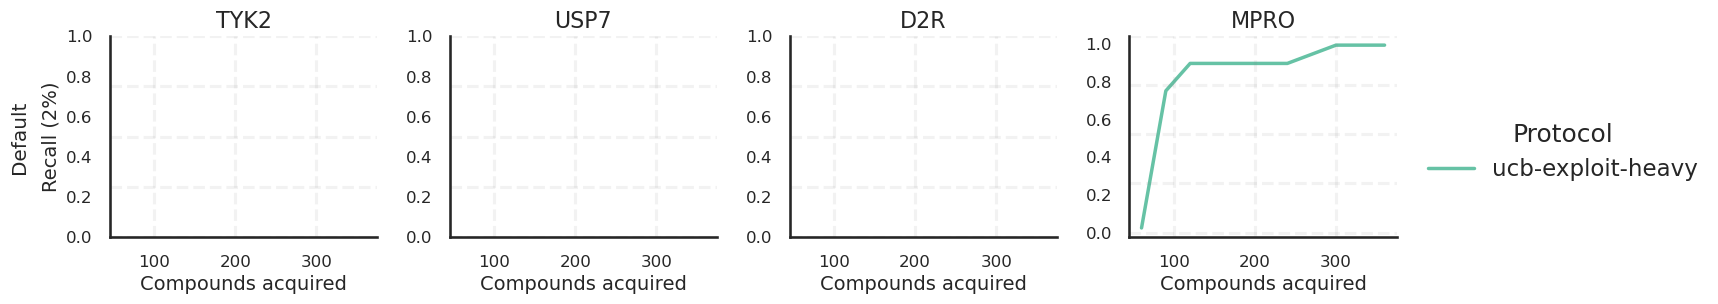

MPRO_ucb-exploit-heavy_final_compounds_acquired,▁
MPRO_ucb-exploit-heavy_final_r2,▁
MPRO_ucb-exploit-heavy_final_rmse,▁
MPRO_ucb-exploit-heavy_final_spearman,▁
MPRO_ucb-exploit-heavy_final_top_2p_recall,▁
MPRO_ucb-exploit-heavy_final_top_5p_recall,▁
compounds_acquired,▁▂▂▃▄▅▅▆▇▇█
cycle,▁▂▂▃▄▅▅▆▇▇█
epoch,▁▃▅▇▂▃▆█▃▅▆▁▃▆█▂▄▆▁▃▅▇▂▄▆█▃▅▇▂▃▆█▃▅▆▁▃▆█
r2,▁▃▅▆▆▆▆▇▇██
rmse,█▆▄▃▃▃▃▂▂▁▁



All experiments completed.


In [33]:
if __name__ == "__main__":
    datasets = {
        #"TYK2": ("DD/data/composite_tyk2.csv", "DD/data/tyk2_chemberta_data_new.npz"),
        #"USP7": ("DD/data/USP7_sorted.csv", "DD/data/usp7_chemberta_data_new.npz"),
        #"D2R": ("DD/data/composite_d2r.csv", "DD/data/d2r_chemberta_data_new.npz"),
        "MPRO": ("DD/data/Mpro_sorted.csv", "DD/data/mpro_chemberta_data_new.npz")
    }
    
 
    
    fingerprint_types = ['ecfp']
    seeds = [42]  # Define the seeds you want to use

    for fingerprint_type in fingerprint_types:
        for kernel in kernels:
            all_metrics = []
            all_recall = []
            all_combined = []

            with wandb.init(project="RQ1", name=f"{fingerprint_type}_{kernel.__class__.__name__}") as run:
                for seed in seeds:
                    np.random.seed(seed)
                    torch.manual_seed(seed)
                    
                    for dataset_name, (dataset_path, chemberta_path) in datasets.items():
                        # Load data
                        original_df = pd.read_csv(dataset_path)
                        
                        # Generate fingerprints
                        fingerprint_generator = FingerprintFactory.get_generator(fingerprint_type, chemberta_path)
                        fingerprints = fingerprint_generator.generate(original_df)

                        print(f"Processing dataset: {dataset_name} with {kernel.__class__.__name__} and {fingerprint_type}, seed {seed}")
                        metrics_df, recall_df, combined_df = run_experiment(original_df, fingerprints, dataset_name, kernel, fingerprint_type, run, seed)
                        all_metrics.append(metrics_df)
                        all_recall.append(recall_df)
                        all_combined.append(combined_df)

                # Concatenate results for all seeds, this fingerprint type, and kernel
                final_metrics_df = pd.concat(all_metrics, ignore_index=True)
                final_recall_df = pd.concat(all_recall, ignore_index=True)
                final_combined_df = pd.concat(all_combined, ignore_index=True)

                # Save results to pickle files
                today = date.today().strftime("%Y-%m-%d")
                kernel_name = kernel.__class__.__name__
                final_metrics_file = f'DD/results/metrics_{fingerprint_type}_{kernel_name}_{today}.pkl'
                final_recall_file = f'DD/results/recall_{fingerprint_type}_{kernel_name}_{today}.pkl'
                final_combined_file = f'DD/results/combined_{fingerprint_type}_{kernel_name}_{today}.pkl'

                final_metrics_df.to_pickle(final_metrics_file)
                final_recall_df.to_pickle(final_recall_file)
                final_combined_df.to_pickle(final_combined_file)

                # Log artifacts to wandb
                artifact = wandb.Artifact(f"experiment_results_{fingerprint_type}_{kernel_name}", type="results")
                artifact.add_file(final_metrics_file)
                artifact.add_file(final_recall_file)
                artifact.add_file(final_combined_file)
                run.log_artifact(artifact)

                # Print summary for this fingerprint type and kernel
                print(f"\nSummary for {fingerprint_type} with {kernel_name}:")
                print(final_metrics_df.groupby(['Dataset', 'Protocol', 'Seed']).last())
                
                # Generate plot for this fingerprint type and kernel
                make_plot_recall(final_recall_df, f"Recall (2%)")

    print("\nAll experiments completed.")

In [35]:
print("\nInitializing target-specific models with MPRO model weights...")

# Load the saved MPRO model
mpro_checkpoint = torch.load('DD/Polaris/saved_models/MPRO_MaternKernel.pth')

# Inspect the structure of the saved model
print("Checkpoint keys:", mpro_checkpoint.keys())
if 'model_state_dict' in mpro_checkpoint:
    print("Model state dict keys:", mpro_checkpoint['model_state_dict'].keys())


Initializing target-specific models with MPRO model weights...
Checkpoint keys: dict_keys(['model_state_dict', 'likelihood_state_dict', 'already_selected_indices', 'cycle', 'metrics'])
Model state dict keys: odict_keys(['likelihood.noise_covar.raw_noise', 'likelihood.noise_covar.raw_noise_constraint.lower_bound', 'likelihood.noise_covar.raw_noise_constraint.upper_bound', 'mean_module.raw_constant', 'covar_module.raw_outputscale', 'covar_module.base_kernel.raw_lengthscale', 'covar_module.base_kernel.raw_lengthscale_constraint.lower_bound', 'covar_module.base_kernel.raw_lengthscale_constraint.upper_bound', 'covar_module.raw_outputscale_constraint.lower_bound', 'covar_module.raw_outputscale_constraint.upper_bound'])



Fine-tuning SARS-CoV-2 model...
Epoch 0/15000 - Loss: 9.3556


Epoch 100/15000 - Loss: 6.9311
Epoch 200/15000 - Loss: 5.4564
Epoch 300/15000 - Loss: 4.5021
Epoch 400/15000 - Loss: 3.8446
Epoch 500/15000 - Loss: 3.3672
Epoch 600/15000 - Loss: 3.0047
Epoch 700/15000 - Loss: 2.7191
Epoch 800/15000 - Loss: 2.4882
Epoch 900/15000 - Loss: 2.3014
Epoch 1000/15000 - Loss: 2.1531
Epoch 1100/15000 - Loss: 2.0374
Epoch 1200/15000 - Loss: 1.9473
Epoch 1300/15000 - Loss: 1.8763
Epoch 1400/15000 - Loss: 1.8190
Epoch 1500/15000 - Loss: 1.7713
Epoch 1600/15000 - Loss: 1.7303
Epoch 1700/15000 - Loss: 1.6939
Epoch 1800/15000 - Loss: 1.6603
Epoch 1900/15000 - Loss: 1.6286
Epoch 2000/15000 - Loss: 1.5978
Epoch 2100/15000 - Loss: 1.5673
Epoch 2200/15000 - Loss: 1.5366
Epoch 2300/15000 - Loss: 1.5055
Epoch 2400/15000 - Loss: 1.4739
Epoch 2500/15000 - Loss: 1.4419
Epoch 2600/15000 - Loss: 1.4099
Epoch 2700/15000 - Loss: 1.3784
Epoch 2800/15000 - Loss: 1.3480
Epoch 2900/15000 - Loss: 1.3196
Epoch 3000/15000 - Loss: 1.2937
Epoch 3100/15000 - Loss: 1.2707
Epoch 3200/15000 

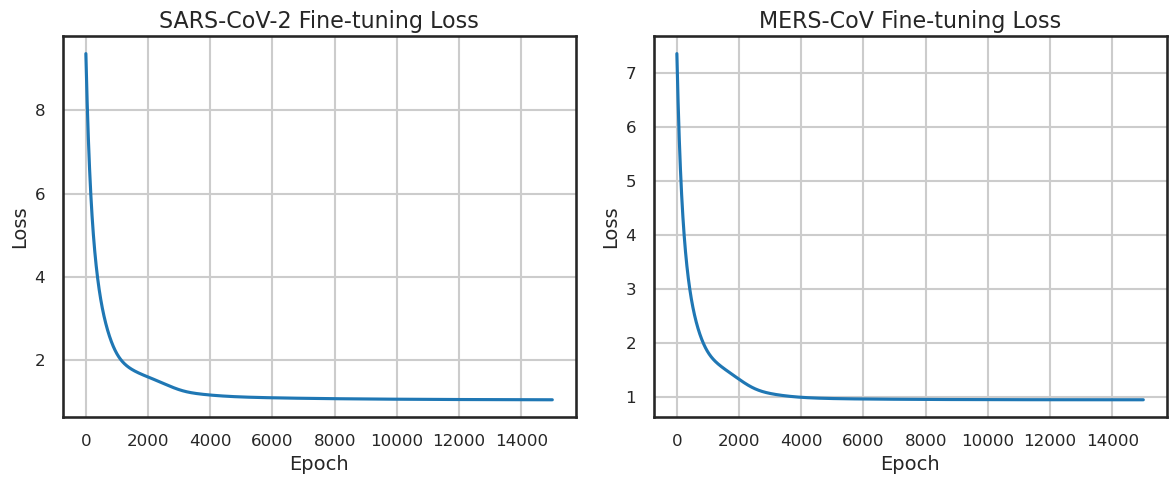

In [46]:
# -------------------------------------------------
# 6. Transfer Learning from MPRO to SARS/MERS
# -------------------------------------------------


# For SARS-CoV-2
likelihood_sars = gpytorch.likelihoods.GaussianLikelihood().to(device)
model_sars = GPRegressionModel(X_train_comp_tensor, Y_sars_tensor, likelihood_sars, kernel=kernels[0]).to(device)

# Load the entire model state dict instead of individual modules
model_sars.load_state_dict(mpro_checkpoint['model_state_dict'])

# For MERS-CoV
likelihood_mers = gpytorch.likelihoods.GaussianLikelihood().to(device)
model_mers = GPRegressionModel(X_train_comp_tensor, Y_mers_tensor, likelihood_mers, kernel=kernels[0]).to(device)

# Load the entire model state dict
model_mers.load_state_dict(mpro_checkpoint['model_state_dict'])

# Fine-tune models using custom learning rates
print("\nFine-tuning SARS-CoV-2 model...")
optimizer_sars = torch.optim.Adam([
    {'params': model_sars.covar_module.parameters(), 'lr': 0.001},  # Lower learning rate for kernel
    {'params': model_sars.mean_module.parameters(), 'lr': 0.005},  # Regular learning rate
    {'params': likelihood_sars.parameters(), 'lr': 0.005},         # Regular learning rate
])

mll_sars = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood_sars, model_sars)
losses_sars = []

model_sars.train()
likelihood_sars.train()
epochs = 15000
for epoch in range(epochs):
    optimizer_sars.zero_grad()
    output = model_sars(X_train_comp_tensor)
    loss = -mll_sars(output, Y_sars_tensor)
    losses_sars.append(loss.item())
    loss.backward()
    optimizer_sars.step()
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs} - Loss: {loss.item():.4f}")

print("\nFine-tuning MERS-CoV model...")
optimizer_mers = torch.optim.Adam([
    {'params': model_mers.covar_module.parameters(), 'lr': 0.001},  # Lower learning rate for kernel
    {'params': model_mers.mean_module.parameters(), 'lr': 0.005},  # Regular learning rate
    {'params': likelihood_mers.parameters(), 'lr': 0.005},         # Regular learning rate
])

mll_mers = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood_mers, model_mers)
losses_mers = []

model_mers.train()
likelihood_mers.train()
for epoch in range(epochs):
    optimizer_mers.zero_grad()
    output = model_mers(X_train_comp_tensor)
    loss = -mll_mers(output, Y_mers_tensor)
    losses_mers.append(loss.item())
    loss.backward()
    optimizer_mers.step()
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs} - Loss: {loss.item():.4f}")

# Plot fine-tuning losses
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses_sars)
plt.title('SARS-CoV-2 Fine-tuning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(losses_mers)
plt.title('MERS-CoV Fine-tuning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.savefig('fine_tuning_losses.png')
plt.show()


Generating predictions...


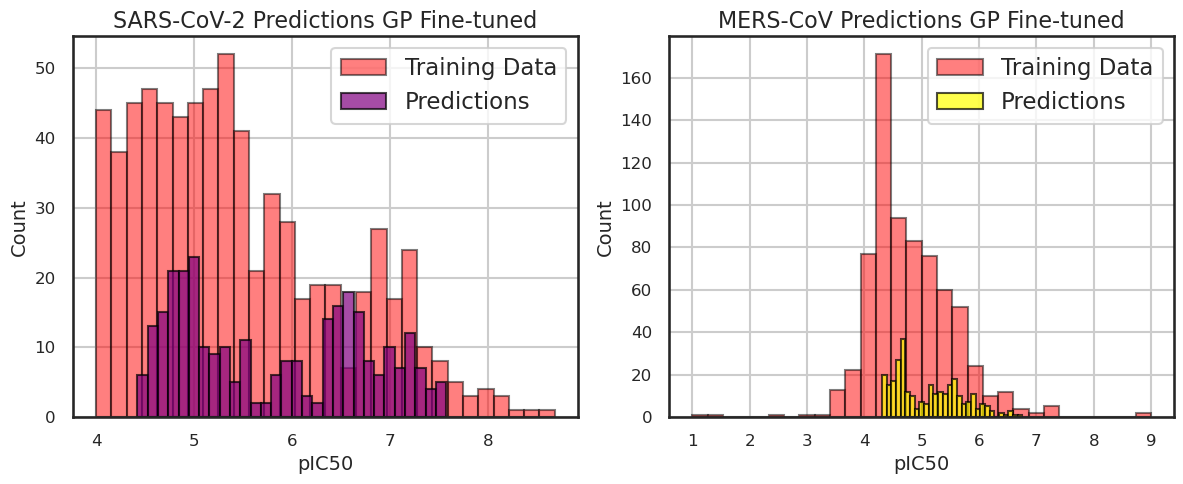

In [47]:
# -------------------------------------------------
# 7. Generate Predictions
# -------------------------------------------------


print("\nGenerating predictions...")
model_sars.eval()
likelihood_sars.eval()
model_mers.eval()
likelihood_mers.eval()

# Use batch prediction if dataset is large to avoid GPU memory issues
batch_size = 512  # Adjust based on your GPU memory
means_sars = []
vars_sars = []
means_mers = []
vars_mers = []

with torch.no_grad(), gpytorch.settings.fast_pred_var():
    # Process in batches to handle large datasets
    for i in range(0, X_test_tensor.size(0), batch_size):
        X_batch = X_test_tensor[i:i+batch_size]
        
        # SARS-CoV-2 predictions
        f_preds_sars = model_sars(X_batch)
        means_sars.append(f_preds_sars.mean.cpu().numpy())
        vars_sars.append(f_preds_sars.variance.cpu().numpy())
        
        # MERS-CoV predictions
        f_preds_mers = model_mers(X_batch)
        means_mers.append(f_preds_mers.mean.cpu().numpy())
        vars_mers.append(f_preds_mers.variance.cpu().numpy())
        
        if i % (batch_size * 4) == 0 and i > 0:
            print(f"Processed {i}/{X_test_tensor.size(0)} test molecules")

# Concatenate batch results
mean_sars = np.concatenate(means_sars)
var_sars = np.concatenate(vars_sars)
mean_mers = np.concatenate(means_mers)
var_mers = np.concatenate(vars_mers)

# Create prediction dictionary for submission
y_pred = {
    'pIC50 (SARS-CoV-2 Mpro)': mean_sars,
    'pIC50 (MERS-CoV Mpro)': mean_mers
}

# Save predictions with uncertainty
results_df = pd.DataFrame({
    'SMILES': test.X,
    'SARS_prediction': mean_sars,
    'SARS_uncertainty': np.sqrt(var_sars),
    'MERS_prediction': mean_mers, 
    'MERS_uncertainty': np.sqrt(var_mers)
})
results_df.to_csv('predictions_with_uncertainty.csv', index=False)

# Plot prediction distributions
plt.figure(figsize=(12, 5))

# SARS-CoV-2 Predictions
plt.subplot(1, 2, 1)
plt.hist(Y_sars, bins=30, alpha=0.5, color='red', edgecolor='black', label='Training Data')
plt.hist(y_pred['pIC50 (SARS-CoV-2 Mpro)'], bins=30, alpha=0.7, color='purple', edgecolor='black', label='Predictions')
plt.title('SARS-CoV-2 Predictions GP Fine-tuned')
plt.xlabel('pIC50')
plt.ylabel('Count')
plt.legend()
plt.grid(True)

# MERS-CoV Predictions
plt.subplot(1, 2, 2)
plt.hist(Y_mers, bins=30, alpha=0.5, color='red', edgecolor='black', label='Training Data')
plt.hist(y_pred['pIC50 (MERS-CoV Mpro)'], bins=30, alpha=0.7, color='yellow', edgecolor='black', label='Predictions')
plt.title('MERS-CoV Predictions GP Fine-tuned')
plt.xlabel('pIC50')
plt.ylabel('Count')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('prediction_distributions.png')
plt.show()

In [ ]:
# # -------------------------------------------------
# # 8. Submit Predictions
# # -------------------------------------------------

# print("\nSubmitting predictions to competition...")
# competition.submit_predictions(
#     predictions=y_pred,
#     prediction_name="gp-transfer-learning",
#     prediction_owner="caithmac",  
#     report_url="https://github.com/caithmac/polaris_potency_mpro", 
#     description="GP model with transfer learning from active learning MPRO model, using Tanimoto kernel",
#     tags=["transfer-learning", "gp-regression", "tanimoto-kernel"],
#     user_attributes={
#         "Framework": "GPyTorch", 
#         "Method": "Transfer Learning GP Regression",
#         "Base Model": "Active Learning MPRO",
#         "Kernel": "Matern"
#     }
# )

# print("Submission completed successfully!")

In [ ]:

# Function to calculate molecular weights for a list of SMILES
def calculate_molecular_weights(smiles_list):
    """Calculate molecular weights for a list of SMILES strings"""
    molecular_weights = []
    valid_indices = []
    
    for i, smi in enumerate(tqdm(smiles_list, desc="Calculating molecular weights")):
        try:
            mol = Chem.MolFromSmiles(smi)
            if mol:
                mw = Descriptors.MolWt(mol)
                molecular_weights.append(mw)
                valid_indices.append(i)
        except Exception as e:
            print(f"Error processing {smi}: {e}")
    
    return molecular_weights, valid_indices

# Calculate molecular weights for training compounds
train_mw, train_valid_indices = calculate_molecular_weights(mpro_df_comp['SMILES'].tolist())

# Calculate molecular weights for test compounds
test_mw, test_valid_indices = calculate_molecular_weights(test.X)

# Create dataframes with molecular weights and pIC50 values
train_data = pd.DataFrame({
    'MW': train_mw,
    'SARS_pIC50': Y_sars[train_valid_indices],
    'MERS_pIC50': Y_mers[train_valid_indices]
})

# For test predictions, we need to filter to match valid indices
test_data = pd.DataFrame({
    'MW': test_mw,
    'SARS_pred': y_pred['pIC50 (SARS-CoV-2 Mpro)'][test_valid_indices],
    'MERS_pred': y_pred['pIC50 (MERS-CoV Mpro)'][test_valid_indices]
})

# Create plots
plt.figure(figsize=(15, 10))

# Training data: MW vs SARS pIC50
plt.subplot(2, 2, 1)
sns.scatterplot(data=train_data, x='MW', y='SARS_pIC50', alpha=0.7)
plt.title('Training Data: Molecular Weight vs SARS-CoV-2 pIC50')
plt.xlabel('Molecular Weight (Da)')
plt.ylabel('pIC50')
plt.grid(alpha=0.3)

# Add a regression line
sns.regplot(data=train_data, x='MW', y='SARS_pIC50', scatter=False, 
            line_kws={'color':'red', 'linestyle':'--'})

# Training data: MW vs MERS pIC50
plt.subplot(2, 2, 2)
sns.scatterplot(data=train_data, x='MW', y='MERS_pIC50', alpha=0.7)
plt.title('Training Data: Molecular Weight vs MERS-CoV pIC50')
plt.xlabel('Molecular Weight (Da)')
plt.ylabel('pIC50')
plt.grid(alpha=0.3)

# Add a regression line
sns.regplot(data=train_data, x='MW', y='MERS_pIC50', scatter=False, 
            line_kws={'color':'red', 'linestyle':'--'})

# Test predictions: MW vs SARS predicted pIC50
plt.subplot(2, 2, 3)
sns.scatterplot(data=test_data, x='MW', y='SARS_pred', alpha=0.7)
plt.title('Test Predictions: Molecular Weight vs SARS-CoV-2 Predicted pIC50')
plt.xlabel('Molecular Weight (Da)')
plt.ylabel('Predicted pIC50')
plt.grid(alpha=0.3)

# Add a regression line
sns.regplot(data=test_data, x='MW', y='SARS_pred', scatter=False, 
            line_kws={'color':'red', 'linestyle':'--'})

# Test predictions: MW vs MERS predicted pIC50
plt.subplot(2, 2, 4)
sns.scatterplot(data=test_data, x='MW', y='MERS_pred', alpha=0.7)
plt.title('Test Predictions: Molecular Weight vs MERS-CoV Predicted pIC50')
plt.xlabel('Molecular Weight (Da)')
plt.ylabel('Predicted pIC50')
plt.grid(alpha=0.3)

# Add a regression line
sns.regplot(data=test_data, x='MW', y='MERS_pred', scatter=False, 
            line_kws={'color':'red', 'linestyle':'--'})

plt.tight_layout()
plt.savefig('DD/Polaris/plots/mw_vs_pic50_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate correlation statistics
train_sars_corr = train_data[['MW', 'SARS_pIC50']].corr().iloc[0,1]
train_mers_corr = train_data[['MW', 'MERS_pIC50']].corr().iloc[0,1]
test_sars_corr = test_data[['MW', 'SARS_pred']].corr().iloc[0,1]
test_mers_corr = test_data[['MW', 'MERS_pred']].corr().iloc[0,1]

print(f"Training data correlations:")
print(f"  MW vs SARS-CoV-2 pIC50: {train_sars_corr:.4f}")
print(f"  MW vs MERS-CoV pIC50: {train_mers_corr:.4f}")
print(f"\nTest predictions correlations:")
print(f"  MW vs SARS-CoV-2 predicted pIC50: {test_sars_corr:.4f}")
print(f"  MW vs MERS-CoV predicted pIC50: {test_mers_corr:.4f}")

# Molecular weight distribution comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_data['MW'], kde=True, color='blue', alpha=0.6)
plt.title('Training Data: Molecular Weight Distribution')
plt.xlabel('Molecular Weight (Da)')
plt.ylabel('Count')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
sns.histplot(test_data['MW'], kde=True, color='green', alpha=0.6)
plt.title('Test Data: Molecular Weight Distribution')
plt.xlabel('Molecular Weight (Da)')
plt.ylabel('Count')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('DD/Polaris/plots/mw_distribution_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Analyze MW ranges and corresponding pIC50 values
mw_bins = [0, 300, 400, 500, 600, 1000]
bin_labels = ['<300', '300-400', '400-500', '500-600', '>600']

# Training data binning
train_data['MW_bin'] = pd.cut(train_data['MW'], bins=mw_bins, labels=bin_labels)
train_binned = train_data.groupby('MW_bin').agg({
    'SARS_pIC50': ['mean', 'std', 'count'],
    'MERS_pIC50': ['mean', 'std', 'count']
})

# Test data binning
test_data['MW_bin'] = pd.cut(test_data['MW'], bins=mw_bins, labels=bin_labels)
test_binned = test_data.groupby('MW_bin').agg({
    'SARS_pred': ['mean', 'std', 'count'],
    'MERS_pred': ['mean', 'std', 'count']
})

print("\nTraining data pIC50 by molecular weight range:")
print(train_binned)
print("\nTest predictions pIC50 by molecular weight range:")
print(test_binned)

# Create a figure showing MW bin means with error bars
plt.figure(figsize=(12, 6))

# Training data binned means
plt.subplot(1, 2, 1)
bin_means_sars = train_binned[('SARS_pIC50', 'mean')]
bin_std_sars = train_binned[('SARS_pIC50', 'std')]
bin_means_mers = train_binned[('MERS_pIC50', 'mean')]
bin_std_mers = train_binned[('MERS_pIC50', 'std')]

x_pos = np.arange(len(bin_labels))
width = 0.35

plt.bar(x_pos - width/2, bin_means_sars, width, yerr=bin_std_sars, 
        label='SARS-CoV-2', alpha=0.7, capsize=5)
plt.bar(x_pos + width/2, bin_means_mers, width, yerr=bin_std_mers, 
        label='MERS-CoV', alpha=0.7, capsize=5)

plt.xlabel('Molecular Weight Range (Da)')
plt.ylabel('Mean pIC50')
plt.title('Training Data: Mean pIC50 by Molecular Weight Range')
plt.xticks(x_pos, bin_labels)
plt.legend()
plt.grid(alpha=0.3)

# Test predictions binned means
plt.subplot(1, 2, 2)
bin_means_sars_pred = test_binned[('SARS_pred', 'mean')]
bin_std_sars_pred = test_binned[('SARS_pred', 'std')]
bin_means_mers_pred = test_binned[('MERS_pred', 'mean')]
bin_std_mers_pred = test_binned[('MERS_pred', 'std')]

plt.bar(x_pos - width/2, bin_means_sars_pred, width, yerr=bin_std_sars_pred, 
        label='SARS-CoV-2', alpha=0.7, capsize=5)
plt.bar(x_pos + width/2, bin_means_mers_pred, width, yerr=bin_std_mers_pred, 
        label='MERS-CoV', alpha=0.7, capsize=5)

plt.xlabel('Molecular Weight Range (Da)')
plt.ylabel('Mean Predicted pIC50')
plt.title('Test Predictions: Mean pIC50 by Molecular Weight Range')
plt.xticks(x_pos, bin_labels)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('DD/Polaris/plots/mw_bin_analysis.png', dpi=300, bbox_inches='tight')
plt.show()